<a href="https://colab.research.google.com/github/ethanpnguyen/ds4e/blob/main/notebooks/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation

Can you segment customers by purchasing behavior?

## Initialize

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [3]:
dfRet = pd.read_csv('/content/retail_transactions.csv', encoding='ISO-8859-1')
dfRet.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Prepare Data

In [4]:
# Calculate row total amount

dfRet['total'] = dfRet['Quantity']*dfRet['UnitPrice']
dfRet.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [5]:
# Aggregate by customer id

dfRtc = dfRet.groupby('CustomerID').agg({'InvoiceNo':'nunique','total':'sum'})

In [6]:
dfRtc

,InvoiceNo,total
CustomerID,,
12346.0,2,0.00
12347.0,7,4310.00
12348.0,4,1797.24
12349.0,1,1757.55
12350.0,1,334.40
...,...,...
18280.0,1,180.60
18281.0,1,80.82
18282.0,3,176.60


In [14]:
# Scale data
from sklearn.preprocessing import scale

X = dfRtc
X[X.columns] = scale(X[X.columns])

Text(0, 0.5, 'amt_total')

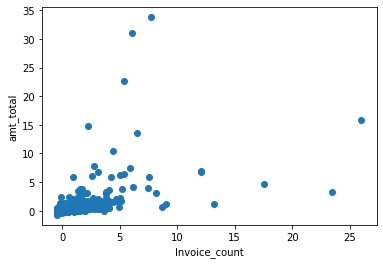

In [15]:
# Scatterplot

plt.scatter(dfRtc['InvoiceNo'], dfRtc['total'])
plt.xlabel('Invoice_count')
plt.ylabel('amt_total')

## Build K-Means Model

In [16]:
from sklearn.cluster import KMeans

mdlKmcRtc = KMeans(n_clusters=2, random_state=0)
mdlKmcRtc.fit(dfRtc)
mdlKmcRtc.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Text(0.5, 1.0, 'K-Means clustering')

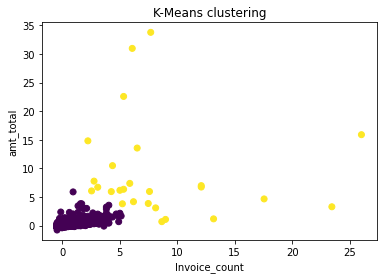

In [17]:
plt.scatter(dfRtc['InvoiceNo'], dfRtc['total'], c=mdlKmcRtc.labels_)
plt.xlabel('Invoice_count')
plt.ylabel('amt_total')
plt.title('K-Means clustering')

In [18]:
from sklearn.metrics import silhouette_score

silhouette_score(dfRtc, mdlKmcRtc.labels_)

0.9503432954038323

In [19]:
# Function for K-means clustering

def cluster_kmeans(X, k):
  mdlKmcRtc = KMeans(n_clusters=k, random_state=0)
  mdlKmcRtc.fit(dfRtc)
  kmeans_labels = mdlKmcRtc.labels_
  kmeans_sil_score = silhouette_score(X, kmeans_labels)
  return (kmeans_labels, kmeans_sil_score)

In [20]:
for k in [2,3,4,5,6]:
  kmeans_labels, kmeans_sil_score = cluster_kmeans(dfRtc, k)
  print(f'k: {k}\tsil_score: {kmeans_sil_score}')

k: 2	sil_score: 0.9503432954038323
k: 3	sil_score: 0.8710310700440448
k: 4	sil_score: 0.8236319740533492
k: 5	sil_score: 0.7554170521819142
k: 6	sil_score: 0.6852298782411089


## Build Hierarchical Cluster

Text(0.5, 1.0, 'Hierarchical Clustering')

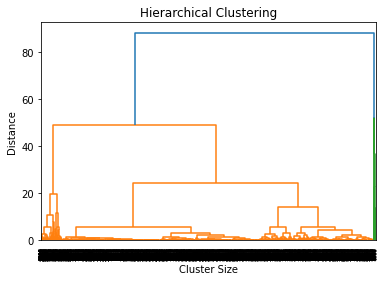

In [21]:
# Visualize the dendrogram

from scipy.cluster import hierarchy

Z = hierarchy.linkage(X,'ward')

hierarchy.dendrogram(Z)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering')

In [22]:
# Build model

from sklearn.cluster import AgglomerativeClustering

mdlHrcRtc = AgglomerativeClustering(n_clusters=2)
mdlHrcRtc.fit(X)
mdlHrcRtc.labels_

silhouette_score(X, mdlHrcRtc.labels_)

0.9509264436578768

Text(0.5, 1.0, 'K-Hierarchical Clustering')

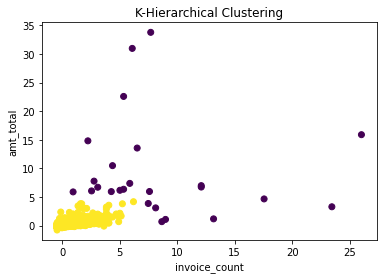

In [23]:
# Scatterplot with hierarchical cluster

import matplotlib.pyplot as plt

plt.scatter(X['InvoiceNo'],X['total'],c=mdlHrcRtc.labels_)
plt.xlabel('invoice_count')
plt.ylabel('amt_total')
plt.title('K-Hierarchical Clustering')

## Build DBSCAN Cluster

In [24]:
from sklearn.cluster import DBSCAN

mdlDbsRtc = DBSCAN(eps=0.3)
mdlDbsRtc.fit(X)
dbscan_labels = mdlDbsRtc.labels_

silhouette_score(X, dbscan_labels)

0.9082453438451032

In [25]:
# calculate number of clusters
dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

In [26]:
# calculate number of anomalies
dbscan_anomalies = list(dbscan_labels).count(-1)

In [27]:
# function for dbscan

def cluster_dbscan(X,e):
  mdlDbsRtc = DBSCAN(eps=e)
  mdlDbsRtc.fit(X)
  dbscan_labels = mdlDbsRtc.labels_
  dbscan_sil_score = silhouette_score(X, dbscan_labels)
  dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
  dbscan_anomalies = list(dbscan_labels).count(-1)
  return(dbscan_sil_score, dbscan_clusters, dbscan_anomalies)

In [28]:
# loop over values of eps
for e in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
  dbscan_sil_score, dbscan_clusters, dbscan_anomalies = cluster_dbscan(X,e)
  print('eps: ', e, '\t clusters: ', dbscan_clusters, '\t anomalies: ', dbscan_anomalies, '\t sil_score: ', dbscan_sil_score)

eps:  0.1 	 clusters:  24 	 anomalies:  235 	 sil_score:  0.44303062146907807
eps:  0.2 	 clusters:  1 	 anomalies:  110 	 sil_score:  0.8835745228080347
eps:  0.3 	 clusters:  1 	 anomalies:  75 	 sil_score:  0.9082453438451032
eps:  0.4 	 clusters:  2 	 anomalies:  60 	 sil_score:  0.8723010302239043
eps:  0.5 	 clusters:  3 	 anomalies:  43 	 sil_score:  0.8277387470113158
eps:  0.6 	 clusters:  3 	 anomalies:  34 	 sil_score:  0.8260463106415202


Text(0.5, 1.0, 'DBSCAN Clustering')

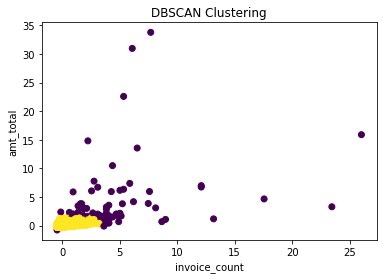

In [29]:
# Scatterplot with hierarchical cluster

import matplotlib.pyplot as plt

plt.scatter(X['InvoiceNo'],X['total'],c=dbscan_labels)
plt.xlabel('invoice_count')
plt.ylabel('amt_total')
plt.title('DBSCAN Clustering')